In [ ]:
# import pandas sebagai aliasnya pd
import pandas as pd

# Baca dataset kunjungan_dokter_gigi_kota_x_dqlab.tsv sesuai dengan url yang diberikan
df_kunjungan = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/kunjungan_dokter_gigi_kota_x_dqlab.tsv", sep="\t")
# Cetak ukuran dataset sehingga diketahui jumlah baris dan kolomnya
print("Ukuran df_kunjungan:", df_kunjungan.shape)
# Cetak data frame df_kunjungan
print(df_kunjungan)

# Baca dataset tingkat_penjualan_kota_x_dqlab.tsv sesuai dengan url yang diberikan
df_penjualan = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/tingkat_penjualan_kota_x_dqlab.tsv", sep="\t")
# Cetak ukuran dataset sehingga diketahui jumlah baris dan kolomnya
print("\n\nUkuran df_penjualan:", df_penjualan.shape)
# Cetak data frame df_penjualan
print(df_penjualan)

Ukuran df_kunjungan: (24, 3)
    Bulan  Tahun  tingkat kunjungan ke dokter gigi
0       1   1996                                37
1       2   1996                                32
2       3   1996                                56
3       4   1996                                43
4       5   1996                                52
5       6   1996                                70
6       7   1996                                64
7       8   1996                                88
8       9   1996                                74
9      10   1996                                98
10     11   1996                                80
11     12   1996                                46
12      1   1997                                66
13      2   1997                                78
14      3   1997                                46
15      4   1997                                62
16      5   1997                               124
17      6   1997                               106
18

In [ ]:
# Gabungkan kolom Tahun dan Bulan menjadi kolom Periode dengan isi tiap barisnya memiliki format YYYY-MM
str_bulan = lambda x: "0"+str(x) if x<10 else str(x)
df_kunjungan["Periode"] = df_kunjungan["Tahun"].map(str) + "-" + df_kunjungan["Bulan"].map(str_bulan)
df_penjualan["Periode"] = df_penjualan["Tahun"].map(str) + "-" + df_penjualan["Bulan"].map(str_bulan)

# Drop kolom Tahun, Bulan dari df_kunjungan
df_kunjungan.drop(columns=["Tahun", "Bulan"], inplace=True)

# Drop kolom Tahun, Bulan dan No dari df_penjualan
df_penjualan.drop(columns=["Tahun", "Bulan", "No"], inplace=True)

# Inspeksi nama-nama kolom di kedua dataframe
print("Nama kolom df_kunjungan:", df_kunjungan.columns)
print("\nNama kolom df_penjualan", df_penjualan.columns)

Nama kolom df_kunjungan: Index(['tingkat kunjungan ke dokter gigi', 'Periode'], dtype='object')

Nama kolom df_penjualan Index(['penjualan permen', 'penjualan sereal', 'penjualan buah pisang',
       'Periode'],
      dtype='object')


In [ ]:
# Set index kolom Periode
df_kunjungan.set_index("Periode", inplace=True)
df_penjualan.set_index("Periode", inplace=True)

# Gabungkan kedua dataframe dengan Periode yang telah menjadi key column nya
df = df_kunjungan.join(df_penjualan)
print("Ukuran df:", df.shape)
print(df)

Ukuran df: (24, 4)
         tingkat kunjungan ke dokter gigi  penjualan permen  penjualan sereal  \
Periode                                                                         
1996-01                                37            200661             10324   
1996-02                                32            297141             13150   
1996-03                                56            235586              5398   
1996-04                                43            299498              7609   
1996-05                                52            395824              5190   
1996-06                                70            247212             14571   
1996-07                                64            273899             13407   
1996-08                                88            184405              8914   
1996-09                                74            141211              3663   
1996-10                                98            292225             14756   
1996-11  

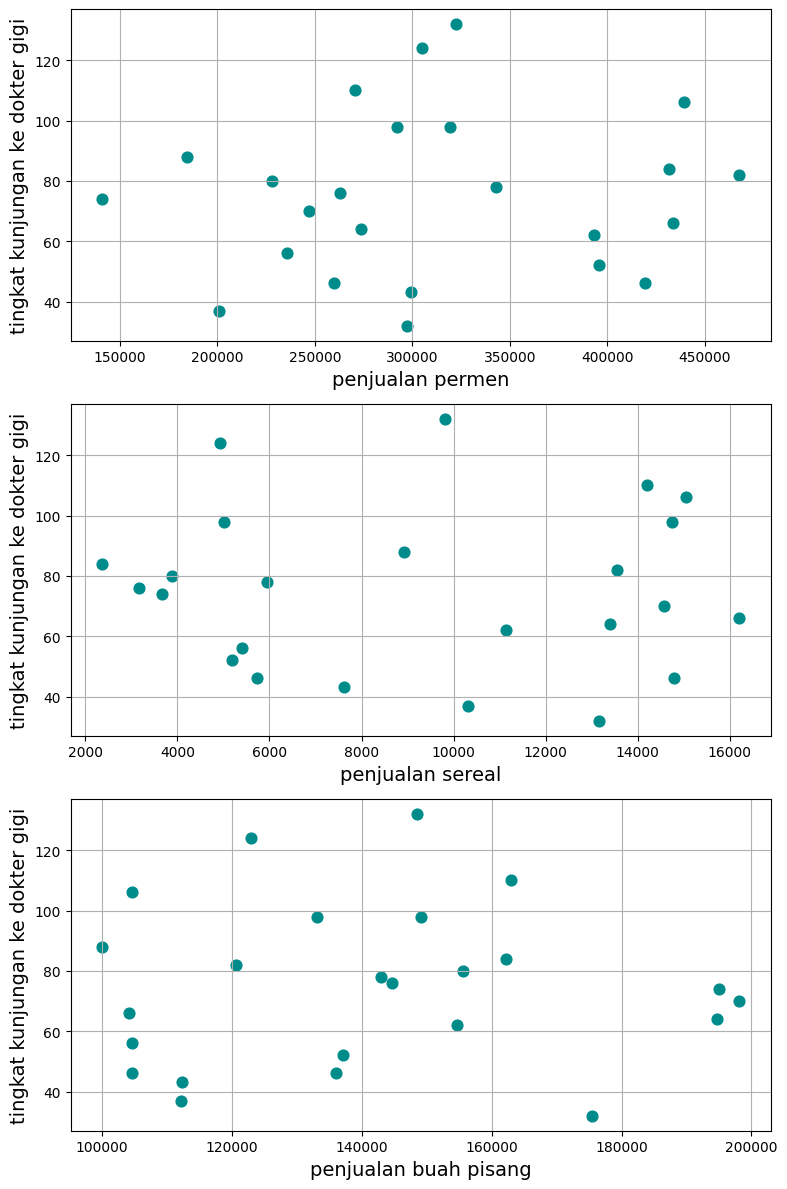

In [ ]:
# Import matplotlib.pyplot sebagai alias
import matplotlib.pyplot as plt
# Kolom x adalah kolom dengan awalan penjualan
x_cols = df.columns[1:]
# Kolom y merupakan kolom tingkat kunjungan ke dokter gigi
y_col = "tingkat kunjungan ke dokter gigi"
# Buat visualisasi
fig, axs = plt.subplots(len(x_cols), 1, figsize=(8,12))
for ax, x_col in zip(axs, x_cols):
    # Plotkan dengan scatter
    df.plot.scatter(x=x_col, y=y_col, c="darkcyan", s=60, ax=ax)
    ax.set_xlabel(x_col, fontsize=14)
    ax.set_ylabel(y_col, fontsize=14)
    ax.grid()
plt.tight_layout()
plt.show()

Koefisien Korelasi Pearson
Koefisien korelasi Pearson (Pearson correlation coefficient) – yang disimbolkan dengan  – digunakan untuk mengukur linieritas dua variabel.

Koefisien korelasi Pearson ini memiliki nilai   Nilai  menunjukkan linieritas sempurna untuk kemiringan (slope) positif. Sedangkan  menunjukkan linieritas yang sempurna juga tetapi untuk kemiringan (slope) negatif. Sementara itu,  justru tidak menunjukkan hubungan sama sekali. Lima buah contoh berikut mengilustrasikan bagaimana koefisien korelasi Pearson ini bernilai untuk dua variabel, x dan y.
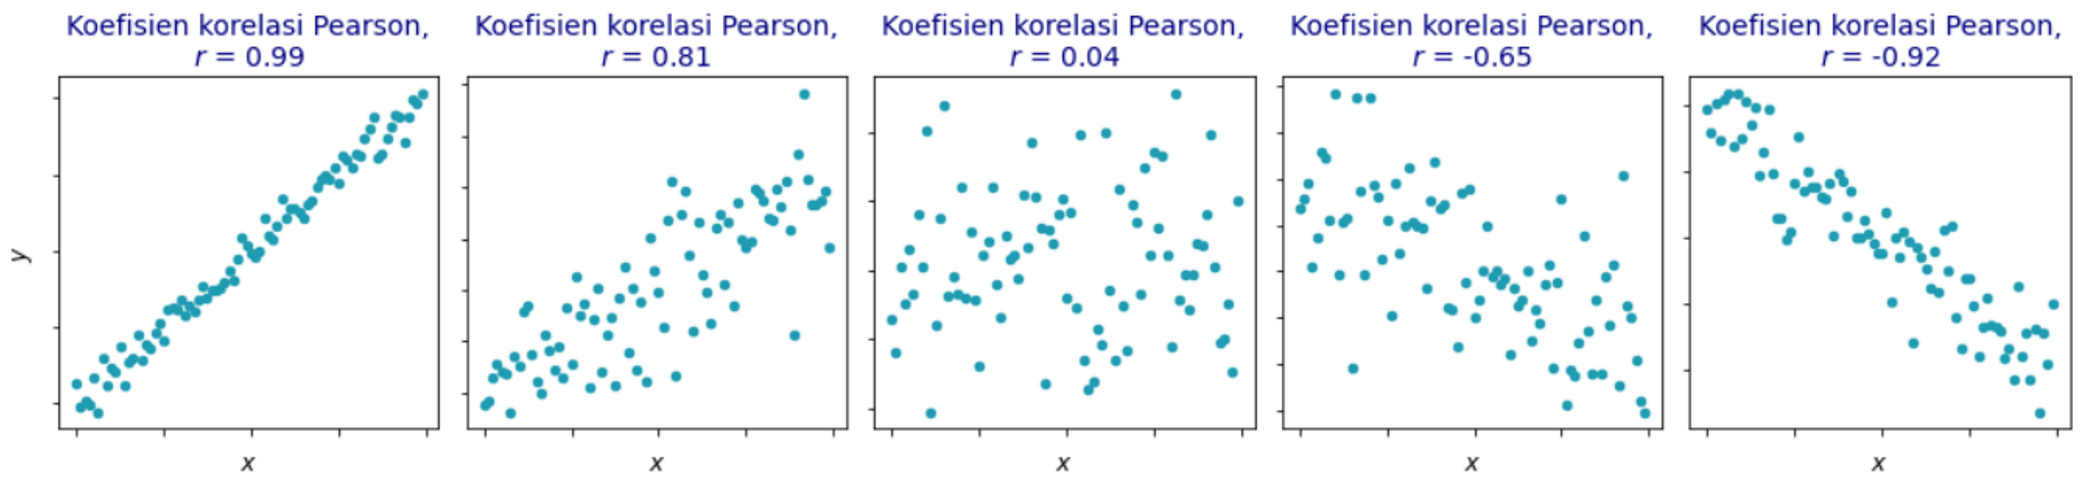

Secara matematis perhitungan korelasi Pearson ini diberikan oleh

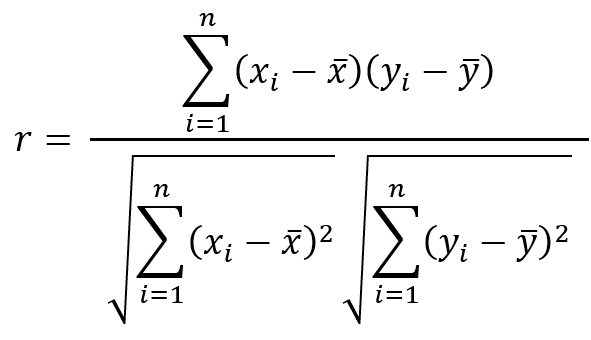

atau

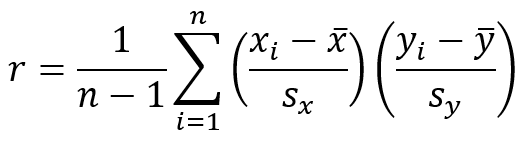

dengan sx merupakan standar deviasi variabel bebas x dan sy adalah standar deviasi variabel bergantung y.

Pada dasarnya, tidak perlu melakukan perhitungan seperti yang dinyatakan kedua persamaan di atas, karena sudah menggunakan pandas yang dapat menentukan koefisien korelasi Pearson antar variabel pada suatu data frame

data_frame.corr(method="pearson", min_periods=1)

dengan parameter

method :

- string nama metode perhitungan koefisien korelasi dengan pilihan yang dapat digunakan adalah "pearson", "kendall", "spearman" atau callable. Defaultnya adalah "pearson". Callable menghendaki input dua buah 1d ndarray yang menghasilkan output skalar float.

min_periods :

- berupa integer dan merupakan nilai minimum observasi yang dibutuhkan untuk pasangan kolom agar menghasilkan harga koefisien korelasi yang valid. Default adalah 1.

Penerapan method .corr ini akan menghasilkan data frame untuk seluruh kolom pada data frame yang digunakan.

Method .corr ini juga dapat diterapkan pada pandas series, dengan parameter

series.corr(other, method="pearson", min_periods=None)

dengan parameter other adalah pandas series lainnya. Sementara itu dua parameter setelahnya sama dengan method .corr pada data frame. Hasil perhitungan ini adalah output skalar float.

In [ ]:
print("Koefisien korelasi Pearson:")
print("---------------------------")
print(df.corr()["tingkat kunjungan ke dokter gigi"])

Koefisien korelasi Pearson:
---------------------------
tingkat kunjungan ke dokter gigi    1.000000
penjualan permen                    0.083333
penjualan sereal                   -0.027465
penjualan buah pisang               0.028650
Name: tingkat kunjungan ke dokter gigi, dtype: float64


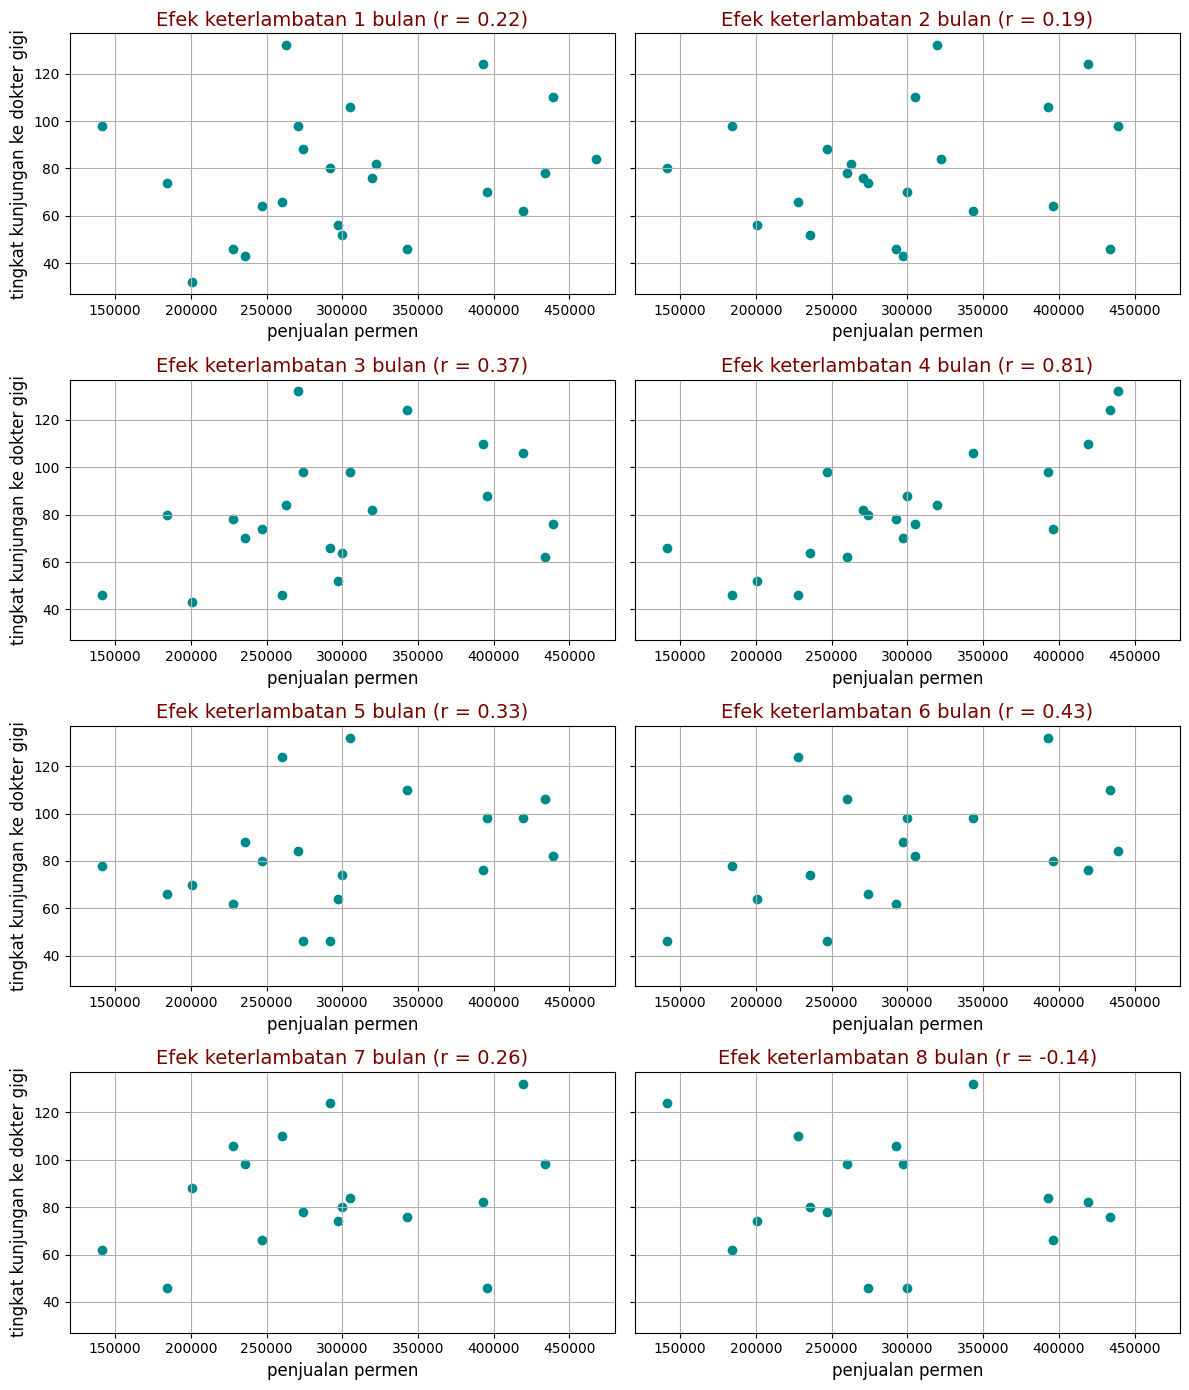

In [ ]:
# import stats dari scipy
from scipy import stats

# Spesifikasi keterlambatan hingga 8 bulan
n_delays = 8
# Spesifikasi jumlah kolom untuk subplots
n_plt_cols = 2
fig, axs = plt.subplots(round(n_delays/2), n_plt_cols, figsize=(12, 3.5*round(n_delays/2)), sharey=True)
for i in range(n_delays):
    # Ingat: varibel bebas dan variabel bergantung harus memiliki ukuran yang sama
    # Ambilah variabel bebas: penjualan permen
    x = df["penjualan permen"][:-(i+1)]
    # Ambilah variabel bergantung: tingkat kunjungan ke dokter gigi dan implementasikan keterlambatan
    y = df["tingkat kunjungan ke dokter gigi"][i+1:]
    # Hitung koefisien korelasi Pearson
    pearson_r, p_value = stats.pearsonr(x, y)
    # Buat title setiap subplots dan juga tambatkan nilai
    # koefisien korelasi Pearson yang telah dihitung
    title = "Efek keterlambatan %d bulan (r = %.2f)" % (i+1, pearson_r)

    # Buat scatter plot
    ax = axs[i // n_plt_cols][i % n_plt_cols]
    ax.scatter(x, y, c="darkcyan")
    ax.set_title(title, fontsize=14, color="maroon")
    if i % n_plt_cols == 0:
        ax.set_ylabel("tingkat kunjungan ke dokter gigi", fontsize=12)
    ax.set_xlabel("penjualan permen", fontsize=12)
    ax.set_xlim([120000, 480000])
    ax.grid()

plt.tight_layout()
plt.show()

In [ ]:
# Import numpy sebagai aliasnya np
import numpy as np
# Ambillah variabel bebas dan bergantung df untuk keterlambatan 4 bulan
# dan ubahlah menjadi numpy 1d narray
x = df["penjualan permen"][:-4].to_numpy()
y = df["tingkat kunjungan ke dokter gigi"][4:].to_numpy()

# Hitunglah nilai rata-rata variabel bebas dan bergantung
x_mean = x.mean()
y_mean = y.mean()

# Hitung nilai pembilang dan penyebut untuk m
m_pembilang = ((x - x_mean) * (y - y_mean)).sum()
m_penyebut = ((x - x_mean)**2).sum()

# Hitung nilai koefisien regresi linier
m = m_pembilang / m_penyebut
b = y_mean - m * x_mean
print("Persamaan regresi linier: y = %.4e * x + %.4f" % (m, b))

Persamaan regresi linier: y = 2.3035e-04 * x + 12.9341


In [ ]:
# Ambillah butir data variabel bebas yang belum digunakan
x_new = df["penjualan permen"][-4:].to_numpy()
#  Gunakan x_new ke dalam persamaan regresi
y_pred = m * x_new + b
print("Prediksi tingkat kunjungan ke dokter gigi 1998-01 s/d 1998-04:")
for i, kunjungan in enumerate(y_pred):
    print("1998-0%d: %4d kunjungan." % (i+1, round(kunjungan)))

Prediksi tingkat kunjungan ke dokter gigi 1998-01 s/d 1998-04:
1998-01:   73 kunjungan.
1998-02:   87 kunjungan.
1998-03:  121 kunjungan.
1998-04:  112 kunjungan.


Regresi Linier dengan numpy.polyfit
“Nja, kayaknya aku bisa membuat kodeku jadi subprogram atau fungsi deh. Nanti kalau aku perlu bisa dipanggil berulang,” ujarku sambil menatap fokus ke layar laptop.

“Ribet itu, ada pustaka python yang dapat digunakan tanpa harus mengerjakan dari awal.”

Aku langsung menoleh ke arah Senja, sambil memasang wajah terkejut dan kesal. “Kenapa ga bilang dari awal Nja?”

“Hehe.. Sorry baru bilang, nih ada penjelasan beberapa fungsi di pustaka python untuk melakukan regresi linier,” ujar Senja sambil menunjukkan halaman modul yang membahas fungsi tersebut.

Aku langsung mempelajari fungsi yang dijelaskan modul, seperti yang di bawah ini.

1. Pustaka Numpy

Numpy memiliki numpy.polyfit() yang dapat digunakan untuk polynomial fitting atau regresi polinom dengan menerapkan metode kuadrat terkecil. Untuk menggunakannya sebagai regresi linier dapat menset deg=1.

numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)

dengan tiga parameter umum yang dapat digunakan, yaitu

- x : 1d numpy ndarray dengan ukuran (n,), untuk n sampel data.

- y : 1d numpy ndarray dengan ukuran (n,) atau 2d numpy ndarray dengan ukuran (n, m), untuk n sampel data.

- deg : derajat polinom yang akan digunakan, berupa int.

Ketika tiga parameter umum digunakan maka akan memperoleh output dalam 1d ndarray, dengan indeks pertamanya merupakan koefisien polinom untuk pangkat tertinggi variabel bebasnya.

Jadi untuk regresi linier numpy.polyfit(x, y, 1), outputnya dapat dibaca sebagai m, b. Untuk melakukan prediksi, dapat menggunakan kode seperti yang telah dilakukan sebelumnya.

Regresi Linier dengan scipy.stats.linregress
2. Pustaka Scipy

Scipy juga fungsi/method untuk menentukan regresi linier dengan menggunakan metode kuadrat terkecil. Regresi linier dapat diakses dari modul stats pada scipy. Sehingga dapat diakses dengan

stats.linregress(x, y=None, alternative="two-sided")

dengan

- x : 1d numpy ndarray dengan ukuran (n,), untuk n sampel data.

- y : 1d numpy ndarray dengan ukuran (n,). Jika menggunakan y untuk nilai defaultnya maka x haruslah 2d numpy ndarray dengan ukuran (n, 2).

- alternative : hipotesis alternatif yang digunakan dengan pilihan "two-sided", "less", "greater". Defaultnya adalah "two-sided".

Method .linregress ini menghasilkan output

- slope : float, kemiringan garis regresi

- intercept : float, intercept garis regresi

- rvalue : float, koefisien regresi

- pvalue : float, nilai p-value untuk hipotesis null

- stderr : float, standar eror estimasi kemiringan

- intercept_stderr : float, standar eror estimasi intercept

Output dapat diakses layaknya atribut pada sebuah kelas. Untuk prediksi, dapat menggunakan kode seperti yang telah dilakukan sebelumnya.

Regresi Linier dengan Scikit-Learn
3. Scikit-Learn

Scikit-Learn merupakan pustaka python untuk pembelajaran mesin (machine learning) juga memiliki kelas untuk menentukan regresi linier. Kelas LinearRegression ini dapat diakses dari modul sklearn.linear_model yang memiliki parameter

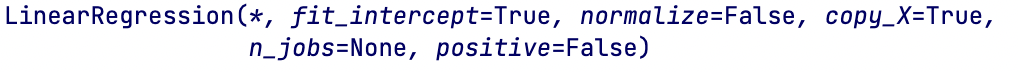

dengan

- fit_intercept : True (default) jika intercept perlu dihitung

- normalize : False (default), True untuk menormalisasi X.

- copy_X : True (default) untuk mengkopi X.

- n_jobs : None (default) atau suatu int untuk menset jumlah prosesor yang digunakan dalam komputasi. -1 untuk penggunaan seluruh prosesor.

- positive : False (default), True untuk memaksa seluruh koefisien atau X.

Kelas ini dapat diinstansiasi ke dalam suatu variabel misal lr. Kemudian, proses komputasi dilakukan dengan menerapkan method .fit, yaitu lr.fit(X, y), dengan X adalah variabel bebas dan y merupakan variabel bergantung. X dinyatakan dalam 2d ndarray berukuran (n, m), dengan m adalah jumlah variabel bebas, untuk kasus ini adalah 1. Sementara itu, y dinyatakan juga dalam dalam 2d ndarray berukuran (n, k), dengan k adalah jumlah variabel bergantung, untuk kasus yang juga bernilai 1.

Koefisien regresi linier merupakan atribut lr yang dapat diakses untuk m sebagai lr.coeff_ dan b diakses dari lr.intercept_. Akhirnya, untuk memprediksi variabel bergantung yang belum diketahui nilainya dapat ditentukan melalui method .predict pada lr, yaitu lr.predict(X). X merupakan variabel bebas baru dinyatakan dalam 2d ndarray berukuran (n, m).

In [ ]:
# Importlah LinearRegression dari sklearn.linear_model
from sklearn.linear_model import LinearRegression

# Ambillah variabel bebas dan bergantung untuk keterlambatan 4 bulan
# dan ubahlah menjadi numpy 2d narray melalui .reshape((-1,1))
x = df["penjualan permen"][:-4].to_numpy().reshape((-1,1))
y = df["tingkat kunjungan ke dokter gigi"][4:].to_numpy().reshape((-1,1))

# Instansiasi LinearRegression ke dalam lr
lr = LinearRegression()
# Terapkan method fit pada variabel bebas dan bergantung
lr.fit(x,y)

# Ambillah butir data variabel bebas yang belum digunakan
# dan ubahlah menjadi numpy 2d narray melalui .reshape((-1,1))
x_new = df["penjualan permen"][-4:].to_numpy().reshape((-1,1))
# Prediksilah x_new dengan method predict
y_pred = lr.predict(x_new)

print("Persamaan regresi linier: y = %.4e * x + %.4f\n" % (lr.coef_, lr.intercept_))
print("Prediksi tingkat kunjungan ke dokter gigi 1998-01 s/d 1998-04:")
for i, kunjungan in enumerate(y_pred):
    print("1998-0%d: %4d kunjungan." % (i+1, round(kunjungan[0])))

Persamaan regresi linier: y = 2.3035e-04 * x + 12.9341

Prediksi tingkat kunjungan ke dokter gigi 1998-01 s/d 1998-04:
1998-01:   73 kunjungan.
1998-02:   87 kunjungan.
1998-03:  121 kunjungan.
1998-04:  112 kunjungan.


In [ ]:
# Ambillah variabel bebas dan bergantung untuk keterlambatan 4 bulan
# dan ubahlah menjadi numpy 1d narray
x = df["penjualan permen"][:-4].to_numpy()
y = df["tingkat kunjungan ke dokter gigi"][4:].to_numpy()

# Penggunaan numpy.polyfit
print("Penggunaan numpy.polyfit:")
np_out = np.polyfit(x, y, 1)
print("  Persamaan regresi linier: y = %.4e * x + %.4f\n" % (np_out[0], np_out[1]))

# Penggunaan stats.linregress
print("Penggunaan stats.linregress dari scipy:")
sclr_out = stats.linregress(x, y)
print("  Persamaan regresi linier: y = %.4e * x + %.4f\n" % (sclr_out.slope, sclr_out.intercept))

# Gunakan salah satu nilai saja dari np_out atau sclr_out
# untuk koefisien regresi liniernya (gunakan sclr_out)

# Ambillah butir data variabel bebas yang belum digunakan
x_new = df["penjualan permen"][-4:].to_numpy()
#  Gunakan x_new ke dalam persamaan regresi linier
y_pred = sclr_out.slope * x_new + sclr_out.intercept
print("Prediksi tingkat kunjungan ke dokter gigi 1998-01 s/d 1998-04:")
for i, kunjungan in enumerate(y_pred):
    print("1998-0%d: %4d kunjungan." % (i+1, round(kunjungan)))
print("")
y_pred = np_out[0] * x_new + np_out[1]
print("Prediksi tingkat kunjungan ke dokter gigi 1998-01 s/d 1998-04:")
for i, kunjungan in enumerate(y_pred):
    print("1998-0%d: %4d kunjungan." % (i+1, round(kunjungan)))

Penggunaan numpy.polyfit:
  Persamaan regresi linier: y = 2.3035e-04 * x + 12.9341

Penggunaan stats.linregress dari scipy:
  Persamaan regresi linier: y = 2.3035e-04 * x + 12.9341

Prediksi tingkat kunjungan ke dokter gigi 1998-01 s/d 1998-04:
1998-01:   73 kunjungan.
1998-02:   87 kunjungan.
1998-03:  121 kunjungan.
1998-04:  112 kunjungan.

Prediksi tingkat kunjungan ke dokter gigi 1998-01 s/d 1998-04:
1998-01:   73 kunjungan.
1998-02:   87 kunjungan.
1998-03:  121 kunjungan.
1998-04:  112 kunjungan.


In [ ]:
df

,tingkat kunjungan ke dokter gigi,penjualan permen,penjualan sereal,penjualan buah pisang
Periode,,,,
1996-01,37,200661,10324,112146
1996-02,32,297141,13150,175417
1996-03,56,235586,5398,104645
1996-04,43,299498,7609,112283
1996-05,52,395824,5190,137083
1996-06,70,247212,14571,198130
1996-07,64,273899,13407,194685
1996-08,88,184405,8914,100091
1996-09,74,141211,3663,194972
